In [1]:
import pandas as pd  
import numpy as np

file = pd.read_csv("./Ordinal Encoded with Scaling (remember to imbalance check in each model).csv") 
file.head(5)


,Unnamed: 0,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0,0.826081,0.722049,0.486024,-0.562497,1.411598,-0.581565,-0.270233,-0.334392,1.378125,...,-0.880700,-1.088087,-1.196072,-0.822769,1.244915,-1.747111,-1.576433,0.128714,-0.362683,0
1,1,0.826081,0.722049,0.486024,-0.249763,-0.012407,-0.581565,-0.270233,-0.334392,-2.522158,...,-0.880700,0.919045,0.836070,-0.822769,1.244915,-1.747111,-1.576433,1.458326,-1.925901,1
2,2,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,0.474571,-1.547087,...,-0.880700,-1.088087,0.836070,-0.822769,-0.165943,-1.747111,-1.576433,-1.200899,-0.362683,1
3,3,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-0.716636,1.458326,-1.404828,1
4,4,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,-0.572016,...,-0.342697,0.919045,0.836070,1.215409,0.539486,0.063085,0.143161,-1.200899,-0.362683,0


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train, test = train_test_split(file, test_size = 0.2, random_state=0)

In [3]:
X_train, X_test = train.drop('Your level of satisfaction in Online Education', axis = 1), test.drop('Your level of satisfaction in Online Education', axis = 1)
y_train, y_test = train['Your level of satisfaction in Online Education'], test['Your level of satisfaction in Online Education']

#Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Train the model and create predictions

reg = model.fit(X_train, y_train)
predictions_test = reg.predict(X_test)

# Printing Predictions
print(predictions_test)

#Calculate performance metrics
from sklearn.metrics import classification_report
clas_matrix = classification_report(y_test, predictions_test)
print(clas_matrix)

#Generate a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions_test)
print(conf_matrix)

[0 2 0 0 0 0 0 1 0 0 0 1 0 0 2 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 2 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 2
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 1 0 0 2 0 0 0 2 0 1 0 1 0 1 2 0 2 1 0 0 0 0
 0 0 0 0 0 0 1 2 0 0 0 0 0 0 2 2 0 0 0 1 0 1 0 0 0 1 0 0 0 2 1 1 1 0 0 0 0
 0 2 0 0 2 1 0 0 0 2 1 0 1 2 2 0 0 1 1 0 2 1 2 0 0 0 0 2 0 0 2 0 0 0 1 0 0
 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0]
              precision    recall  f1-score   support

           0       0.63      0.88      0.74       105
           1       0.61      0.49      0.54        39
           2       0.84      0.41      0.55        63

    accuracy                           0.66       207
   macro avg       0.70      0.59      0.61       207
weighted avg       0.69      0.66      0.64       207

[[92  9  4]
 [19 19  1]
 [34  3 26]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


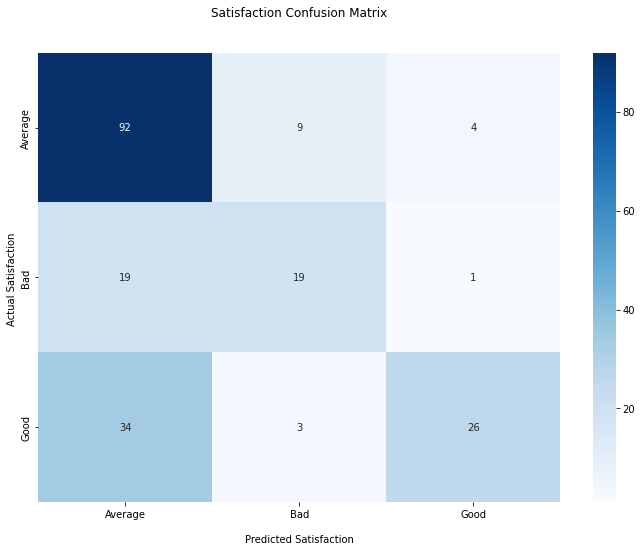

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_map = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

conf_map.set_title('Satisfaction Confusion Matrix\n\n');
conf_map.set_xlabel('\nPredicted Satisfaction')
conf_map.set_ylabel('Actual Satisfaction ');

## Ticket labels - List must be in alphabetical order
conf_map.xaxis.set_ticklabels(['Average','Bad', 'Good'])
conf_map.yaxis.set_ticklabels(['Average','Bad', 'Good'])

## Display the visualization of the Confusion Matrix.
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 111.7,8.27

plt.show()

